In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [ ]:
data = pd.read_csv('/content/ready_data_2.csv')
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Computation        372 non-null    int64
 1   Memorization       372 non-null    int64
 2   Creativity         372 non-null    int64
 3   Analysis           372 non-null    int64
 4   Encoded Time slot  372 non-null    int64
dtypes: int64(5)
memory usage: 14.7 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Computation,372.0,3.086022,1.480554,1.0,2.0,3.0,4.00,5.0
Memorization,372.0,3.379032,1.247700,1.0,2.0,3.0,4.00,5.0
Creativity,372.0,3.225806,1.372656,1.0,2.0,3.0,4.00,5.0
Analysis,372.0,3.432796,1.298267,1.0,3.0,4.0,4.25,5.0
Encoded Time slot,372.0,4.774194,3.139623,0.0,2.0,5.0,7.00,11.0


<Axes: >

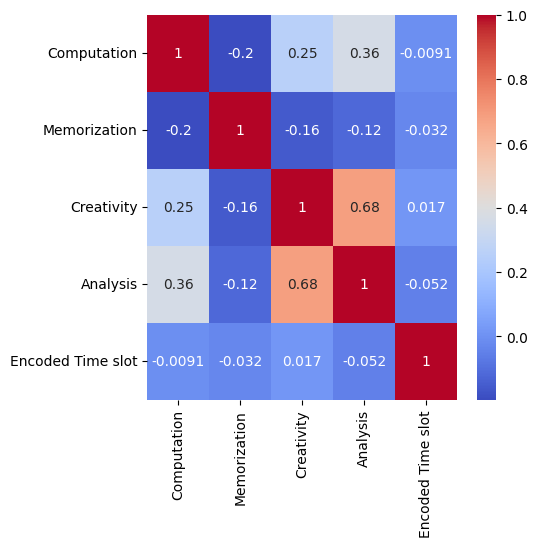

In [ ]:
corr = df.corr()
plt.figure(figsize=(df.shape[1],df.shape[1]))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [ ]:
duplicates = data.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, display the duplicated rows
print("Duplicated rows:")
print(data[duplicates])


Number of duplicate rows: 32
Duplicated rows:
     Computation  Memorization  Creativity  Analysis  Encoded Time slot
31             5             3           5         5                  7
110            5             4           5         5                  7
146            5             5           5         5                  6
148            1             5           1         1                  1
173            5             1           1         1                  3
181            1             5           1         1                  5
188            3             4           5         5                  1
197            4             3           5         4                  8
206            5             5           5         5                  1
208            1             4           3         3                  4
209            1             5           1         3                  1
218            2             5           2         2                 11
223            1  

In [ ]:
data['Encoded Time slot'].value_counts()

,count
Encoded Time slot,
6,56
1,45
7,37
5,37
3,33
0,32
4,32
2,30
8,25


In [ ]:
# import the models that i will use
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gnb = GaussianNB()
lg = LogisticRegression(max_iter = 2000)
tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, verbose=1)
model = [gnb,lg,tree,knn,rf,svc,xgb,grid_search_xgb]

In [ ]:
X = df.drop(['Encoded Time slot'], axis=1)
y = df['Encoded Time slot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def models(df, model):


    print("----------------------------------------------------------------------------------")
    print("First: Cross-validation on training data")
    print("----------------------------------------------------------------------------------")

    for i in model:
        # Perform cross-validation using original training data
        cv = cross_val_score(i, X_train, y_train, cv=5)
        model_name = type(i).__name__
        print('Name: ' + model_name)
        print(f"Cross-validation mean accuracy: {cv.mean():.2f}")
        print('################')

    print("----------------------------------------------------------------------------------")
    print("Second: Accuracy for predictions")
    print("----------------------------------------------------------------------------------")

    for i in model:
        # Train the model on the original training data
        i.fit(X_train, y_train)

        # Predict on training and testing sets
        y_pred_t = i.predict(X_train)
        y_pred_s = i.predict(X_test)

        model_name = type(i).__name__
        print('Name: ' + model_name)

        # Accuracy on training data
        accuracy_t = accuracy_score(y_train, y_pred_t)
        print(f"Accuracy for train: {accuracy_t:.2f}")

        # Accuracy on the testing data
        accuracy_s = accuracy_score(y_test, y_pred_s)

        precision_s = precision_score(y_test, y_pred_s, average='macro', zero_division=0)
        recall_s = recall_score(y_test, y_pred_s, average='macro', zero_division=0)
        cm = confusion_matrix(y_test, y_pred_s)
        print(f"Precision for test: {precision_s:.2f}")
        print(f"Recall for test: {recall_s:.2f}")
        print(f"Confusion Matrix for test:\n{cm}")
        print("+++++++++++++++++==================+++++++++++++++++")



        print(f"Accuracy for test: {accuracy_s:.2f}")
        print("+++++++++++++++++==================+++++++++++++++++")


In [ ]:
models(df,model)

----------------------------------------------------------------------------------
First: Cross-validation on training data
----------------------------------------------------------------------------------
Name: GaussianNB
Cross-validation mean accuracy: 0.11
################
Name: LogisticRegression
Cross-validation mean accuracy: 0.10
################
Name: DecisionTreeClassifier
Cross-validation mean accuracy: 0.09
################
Name: KNeighborsClassifier
Cross-validation mean accuracy: 0.09
################
Name: RandomForestClassifier
Cross-validation mean accuracy: 0.07
################
Name: SVC
Cross-validation mean accuracy: 0.10
################
Name: XGBClassifier
Cross-validation mean accuracy: 0.08
################
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:04:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.1144781144781145
Test Accuracy: 0.14666666666666667
